# Data Transformation

Data in different scales.

Values in a dataset might have a variety of different magnitudes, ranges, or scales.
Algorithms that use distance as a parameter may not weigh all these in the same way. 
There are various data transformation techniques that are used to transform the features of our data so that they use the same scale, magnitude, or range. 
This ensures that each feature has an appropriate effect on a model's predictions.
Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant.

Reference: Data Science with Python
By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen
July 2019

https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec08/data-in-different-scales

# Implementing Scaling Using the Standard Scaler Method

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('Wholesale customers data.csv')

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
dtypes = df.dtypes
dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method.
Using the StandardScaler method, we will scale the data into a uniform unit over all the columns. 
The values of all the features will be converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

In [26]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Implementing Scaling Using the MinMax Scaler Method

Perform MinMax scaling and print the initial five values of the new dataset. To do so, use the MinMaxScaler() class from sklearn.preprocessing and implement the fit_transorm() method. Add the following code to implement this:
Using the MinMaxScaler method, we will scale the data into a uniform unit over all the columns

In [27]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


# Parte B

In [28]:
# 1) el total de lo que se gastó de leche por región
print(df.loc[:,['Region','Milk']].groupby('Region').sum())

print('----------------------------------')
# 2) el total de lo que se gastó de abarrotes por canal. 
print(df.loc[:,['Channel','Grocery']].groupby('Channel').sum())

           Milk
Region         
1        422454
2        239144
3       1888759
----------------------------------
         Grocery
Channel         
1        1180717
2        2317845


# Parte D

In [29]:
# New data frame Nombre - Ciudad - Edad
data = {'Nombre': ['Ana', 'Luis', 'Sofia', 'Pedro', 'Elena'],
        'Ciudad': ['Monterrey', 'Guadalajara', 'CDMX', 'Monterrey', 'Guadalajara'],
        'Edad': [25, 30, 28, 35, 27]}

df = pd.DataFrame(data)
print(df)

# perform one-hot encoding to Ciudad
df = pd.get_dummies(df, columns=['Ciudad'])
print(df)

  Nombre       Ciudad  Edad
0    Ana    Monterrey    25
1   Luis  Guadalajara    30
2  Sofia         CDMX    28
3  Pedro    Monterrey    35
4  Elena  Guadalajara    27
  Nombre  Edad  Ciudad_CDMX  Ciudad_Guadalajara  Ciudad_Monterrey
0    Ana    25        False               False              True
1   Luis    30        False                True             False
2  Sofia    28         True               False             False
3  Pedro    35        False               False              True
4  Elena    27        False                True             False


# Parte F

In [38]:
df =pd.read_excel('formResponses.xlsx')

In [39]:
#copy of the original DataFrame
df_copy = df.copy()

# List of new column titles
new_column_titles = [
    "Timestamp",
    "Name of Student",
    "Registration Number",
    "Course Content Preparedness",
    "Teacher Preparedness",
    "Student Engagement",
    "Course Coverage",
    "Discussion and Response",
    "Skill/Knowledge at Start",
    "Skill/Knowledge at End",
    "Skill/Knowledge Required",
    "Contribution to Skill/Knowledge",
    "Instructor Effectiveness",
    "Presentation Clarity",
    "Stimulation of Interest",
    "Effective Use of Time",
    "Instructor Availability",
    "Grading and Feedback",
    "Clarity of Learning Objectives",
    "Organization and Planning",
    "Appropriateness of Workload",
    "Student Participation",
    "Course Usefulness",
    "Course Improvement Suggestions",
    "Project Engagement Experience",
    "Skills or Aspects Gained"
]

# Ensure the number of columns in the copied DataFrame matches the new column titles
if len(df_copy.columns) == len(new_column_titles):
    df_copy.columns = new_column_titles
else:
    raise ValueError("The number of columns in the DataFrame does not match the number of provided titles.")


In [40]:
# Calculate indices of columns to remove
columns_to_remove_indices = [0, 1, 2] + list(range(df_copy.shape[1] - 3, df_copy.shape[1]))
df_copy = df_copy.drop(columns=df_copy.columns[columns_to_remove_indices])

In [41]:
df_copy = df_copy.iloc[:, :-1]

In [42]:
df_copy = df_copy.iloc[:-1]

In [43]:
# Drop the last row (if not already removed)
df_copy = df_copy.iloc[:-1]

# Define custom mappings
custom_mappings = {
    "Course Content Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Teacher Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Student Engagement": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Course Coverage": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Discussion and Response": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge at Start": {"Poor": 1, "Fair": 2, "Satisfactory": 3, "Very good": 4, "Excellent": 5},
    "Skill/Knowledge at End": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge Required": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Contribution to Skill/Knowledge": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Instructor Effectiveness": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Presentation Clarity": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Stimulation of Interest": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Effective Use of Time": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Instructor Availability": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Grading and Feedback": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Clarity of Learning Objectives": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Organization and Planning": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Appropriateness of Workload": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Student Participation": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
}

# Apply custom mappings
df_encoded = df_copy.copy()
for column, mapping in custom_mappings.items():
    df_encoded[column] = df_encoded[column].map(mapping)


## K-means clustering

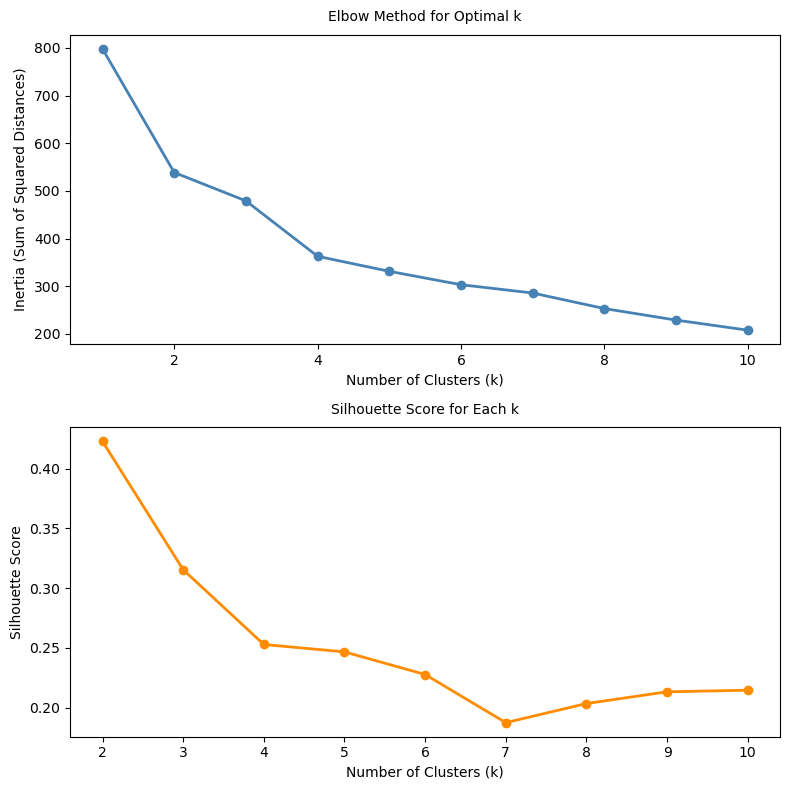

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Use the elbow method and calculate Silhouette Score for each k
inertia = []
sil_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Only calculate silhouette score for k >= 2
    if k > 1:
        sil_score = silhouette_score(df_scaled, kmeans.labels_)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(None)

plt.figure(figsize=(8, 8))

# Elbow Curve (Inertia)
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Silhouette Score
plt.subplot(2, 1, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=6)
plt.title('Silhouette Score for Each k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

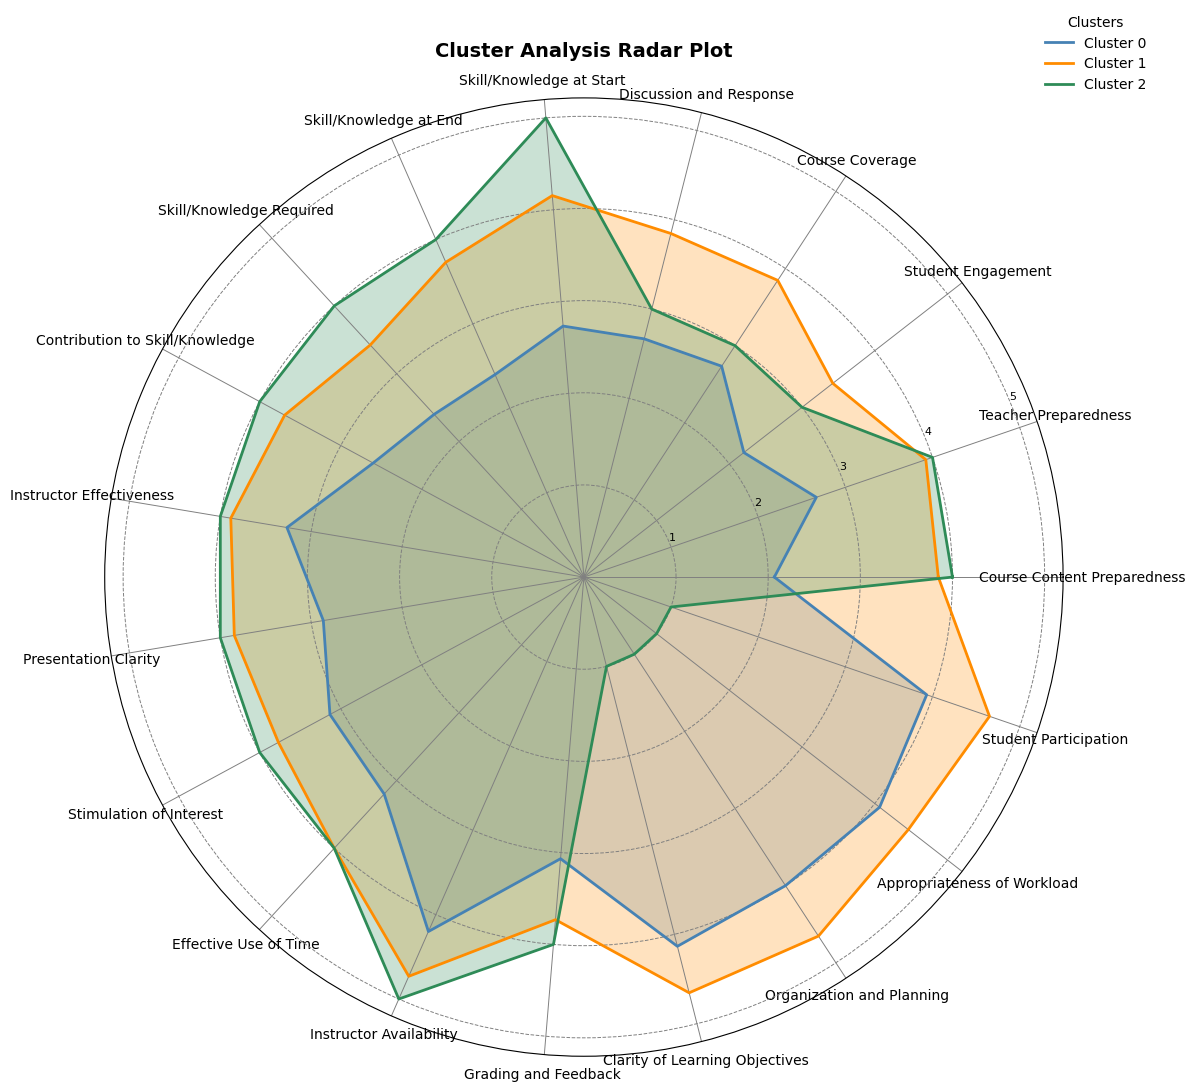

In [46]:
import numpy as np

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply k-means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze each cluster by feature averages
cluster_averages = df_encoded.groupby('Cluster').mean()

# Define the features for the radar plot
features = cluster_averages.columns.tolist()
num_features = len(features)

# Add the first feature to the end to close the radar plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Minimalist styling for the radar plot with polar lines
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))  # Set a square figure size

# Plot each cluster with polar lines
colors = ['steelblue', 'darkorange', 'seagreen']  # Colors for clusters
for cluster in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[cluster].tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2, color=colors[cluster], linestyle='solid')
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])  # Use slight transparency for the fill

# Add labels for the features
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10, color='black')  # Use clean, readable labels

# Customize gridlines and add polar lines
ax.tick_params(axis='y', labelsize=8, colors='black')  # Adjust radial tick labels
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')  # Circular gridlines
ax.xaxis.grid(True, linestyle='-', linewidth=0.7, color='gray')  # Polar (radial) gridlines

# Add title and legend
plt.title('Cluster Analysis Radar Plot', size=14, pad=30, color='black', fontweight='bold')  # Title styling
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10, frameon=False, title='Clusters')

# Adjust layout and display
plt.tight_layout()
plt.show()


# Analisis final

El metodo de K-means clustering nos permite identificar de que manera se relacionan los datos, de esta manera se pueden evitar sesgos que metodos estadisticos basicos pueden causar. El conocer en que manera se agrupan los datos nos permite entenderlos de una manera mas completa y con una perspectiva sin sesgos.